In [ ]:
# !unzip "drive/MyDrive/Colab Notebooks/Pneumonia.zip" -d "drive/MyDrive/Colab Notebooks/Pneumonia"

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [2]:
train_path= 'drive/MyDrive/Colab Notebooks/Pneumonia/chest_xray/train'
test_path='drive/MyDrive/Colab Notebooks/Pneumonia/chest_xray/test'

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
# model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1536)        0         
 ise)                                                            
                                                                 
 flatten (Flatten)           (None, 75264)             0         
                                                                 
 dense (Dense)               (None, 512)               38535680  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                          

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

lrp = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath = 'drive/MyDrive/Colab Notebooks/Pneumonia/pneumonia_model.h5'  # Change filepath extension to .keras
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks = [checkpoint, lrp]

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=50,
    callbacks=callbacks
)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 1.0250 - accuracy: 0.6650 - precision: 0.8727 - recall: 0.6443 - auc: 0.7535
Epoch 1: val_accuracy improved from -inf to 0.77724, saving model to drive/MyDrive/Colab Notebooks/Pneumonia/pneumonia_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 307s 6s/step - loss: 1.0250 - accuracy: 0.6650 - precision: 0.8727 - recall: 0.6443 - auc: 0.7535 - val_loss: 1.2426 - val_accuracy: 0.7772 - val_precision: 0.7485 - val_recall: 0.9692 - val_auc: 0.8426 - lr: 0.0010
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.7450 - precision: 0.8403 - recall: 0.7576 - auc: 0.8320
Epoch 2: val_accuracy improved from 0.77724 to 0.85096, saving model to drive/MyDrive/Colab Notebooks/Pneumonia/pneumonia_model.h5
50/50 [==============================] - 56s 1s/step - loss: 0.5591 - accuracy: 0.7450 - precision: 0.8403 - recall: 0.7576 - auc: 0.8320 - val_loss: 0.3946 - val_accuracy: 0.8510 - val_precision: 0.8445 - val_recall: 0.9333 - val_auc: 0.9282 - lr: 0.0010
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.5483 - accuracy: 0.7800 - precision: 0.8881 - recall: 0.8041 - auc: 0.8119
Epoch 3: val_accuracy improved from 0.85096 to 0.86218, saving mod

In [8]:
model.evaluate(train_generator)

1308/1308 [==============================] - 712s 545ms/step - loss: 0.1726 - accuracy: 0.9365 - precision: 0.9505 - recall: 0.9647 - auc: 0.9801


[0.1725638508796692,
 0.9365443587303162,
 0.9505201578140259,
 0.9647179841995239,
 0.9800750613212585]

In [9]:
model.evaluate(validation_generator)

156/156 [==============================] - 17s 110ms/step - loss: 0.2841 - accuracy: 0.8718 - precision: 0.8384 - recall: 0.9846 - auc: 0.9704


[0.2841103971004486,
 0.8717948794364929,
 0.8384279608726501,
 0.9846153855323792,
 0.9703594446182251]

In [ ]:
tf.keras.utils.plot_model(model,
                          show_shapes=True,
                          expand_nested=True)

In [20]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()
    except:
      pass

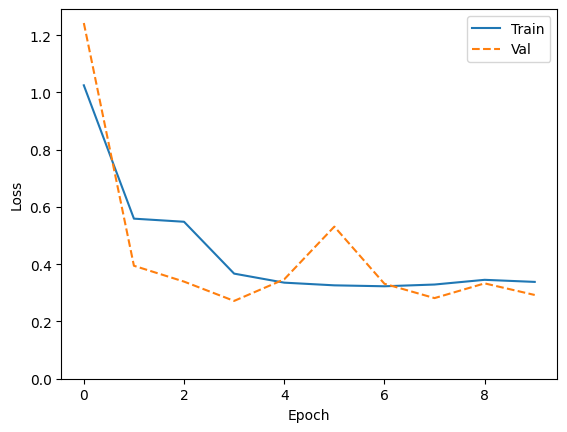

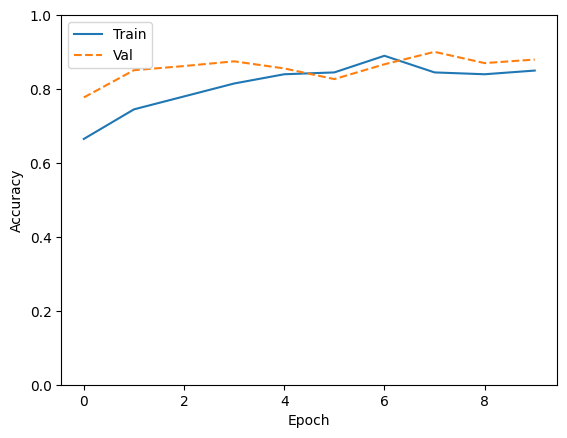

In [12]:
plot_metrics(history)

1/1 [==============================] - 0s 49ms/step
[[0.8987774]]
THE UPLOADED X-RAY IMAGE IS: Pneumonia


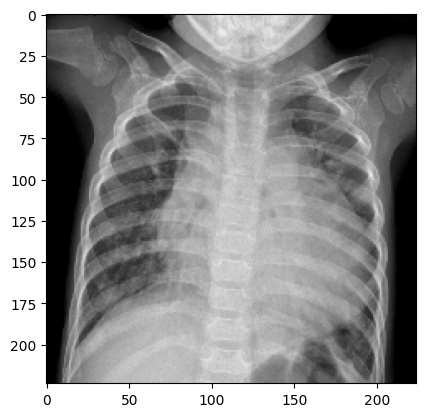

In [19]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('drive/MyDrive/Colab Notebooks/Pneumonia/chest_xray/test/PNEUMONIA/BACTERIA-3961172-0004.jpeg',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a>0.5:
      op="Pneumonia"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))